Primeiro importamos as Bibliotecas necessárias

Numpy para operações com arrays, matplotlib para visualização, load_iris para carregar o dataset, GaussianNB para nosso modelo Naive Bayes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from matplotlib.patches import Patch

Aqui carregamos os dados e escolhemos duas variáveis (features) — isso é importante para que possamos plotar os dados em um gráfico 2D.
X são as características, y são as classes (espécies das flores).

In [2]:
# Carregar o dataset Iris (um dataset popular de aprendizado de máquina)
iris = load_iris()  # A função load_iris() carrega o dataset Iris, que contém dados sobre flores Iris, incluindo características como comprimento e largura das sépalas e pétalas.

# Selecionar apenas as colunas de comprimento e largura das pétalas (índices 2 e 3)
X = iris.data[:, 2:4]  # iris.data é uma matriz com todas as características do dataset. Aqui estamos selecionando apenas as colunas correspondentes ao comprimento e largura das pétalas, que estão nos índices 2 e 3 da matriz.

# Variável de destino (rótulos ou classes de flores)
y = iris.target  # iris.target contém os rótulos para cada amostra, que representam as classes das flores Iris (Setosa, Versicolor, Virginica).

# Nomes das classes (as espécies das flores)
target_names = iris.target_names  # iris.target_names contém os nomes das classes de flores correspondentes aos rótulos em 'y', ou seja, ['setosa', 'versicolor', 'virginica'].


Criamos e treinamos o modelo Naive Bayes com os dados que selecionamos, usando GaussianNB

In [3]:
# Treinar o modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(X, y)

GaussianNB()

Criamos uma grade de pontos em todo o espaço das variáveis para que possamos prever a classe em cada ponto e desenhar as regiões no gráfico.

In [4]:
# Criar a malha para a fronteira de decisão

# Define os limites do eixo x (mínimo e máximo da 1ª feature com uma margem de 1 unidade)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# Define os limites do eixo y (mínimo e máximo da 2ª feature com uma margem de 1 unidade)
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Cria uma grade (meshgrid) com 200 divisões em cada eixo, abrangendo o intervalo x_min–x_max e y_min–y_max
# Isso gera uma matriz de coordenadas xx e yy que cobrem toda a área dos dados
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Concatena as coordenadas da grade em um array 2D onde cada linha é um ponto (x, y)
# Essa estrutura será usada para fazer previsões do modelo em todos os pontos da malha
grid = np.c_[xx.ravel(), yy.ravel()]


 Aqui, usamos o modelo para prever as classes em cada ponto do grid.
Depois, reorganizamos os resultados para que possam ser desenhados como uma imagem de fundo.

In [5]:
# Prever a classe para cada ponto do grid
Z = modelo.predict(grid)
Z = Z.reshape(xx.shape)

Por fim, desenhamos o gráfico!
As regiões coloridas mostram como o Naive Bayes separa as espécies de flores, e os pontos mostram as amostras reais com uma legenda colorida associando as classes às suas respectivas espécies de flores

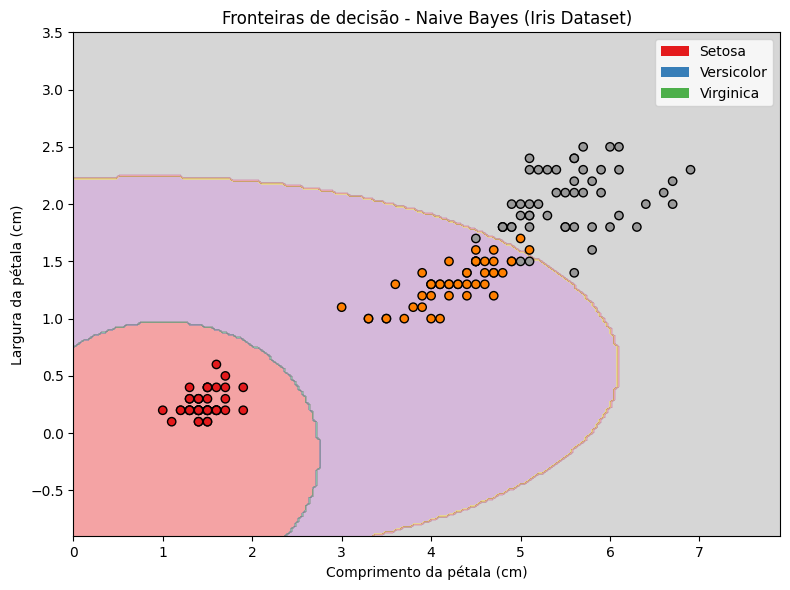

In [9]:
# Plotar fronteiras
plt.figure(figsize=(8, 6))  # Cria uma nova figura com tamanho 8x6 polegadas

# Cria um gráfico de contorno preenchido (contourf), que mostra as regiões de decisão do classificador
# xx e yy são as coordenadas da grade, Z são os rótulos preditos para cada ponto
# alpha controla a transparência das cores e cmap define o mapa de cores usado (Set1)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)

# Plota os pontos reais do conjunto de dados
# X[:, 0] e X[:, 1] são as duas features selecionadas (ex: comprimento e largura da pétala)
# c=y define a cor de cada ponto com base na classe real
# edgecolor='k' adiciona uma borda preta aos pontos para melhor visualização
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)

# Adiciona rótulo ao eixo X
plt.xlabel('Comprimento da pétala (cm)')

# Adiciona rótulo ao eixo Y
plt.ylabel('Largura da pétala (cm)')

# Define o título do gráfico
plt.title('Fronteiras de decisão - Naive Bayes (Iris Dataset)')

# Legenda
legend_elements = [
    Patch(facecolor=plt.cm.Set1(0), label='Setosa'),      # Cria uma entrada de legenda para a classe Setosa
    Patch(facecolor=plt.cm.Set1(1), label='Versicolor'),  # Classe Versicolor
    Patch(facecolor=plt.cm.Set1(2), label='Virginica')    # Classe Virginica
]
# Adiciona a legenda ao gráfico, no canto superior direito
plt.legend(handles=legend_elements, loc='upper right')

# Ajusta o layout automaticamente para evitar sobreposição de elementos
plt.tight_layout()

# Exibe o gráfico
plt.show()

